# Types of Gradient Decsent:
### There are three popular types  that mainly differ in the amount of data they use:

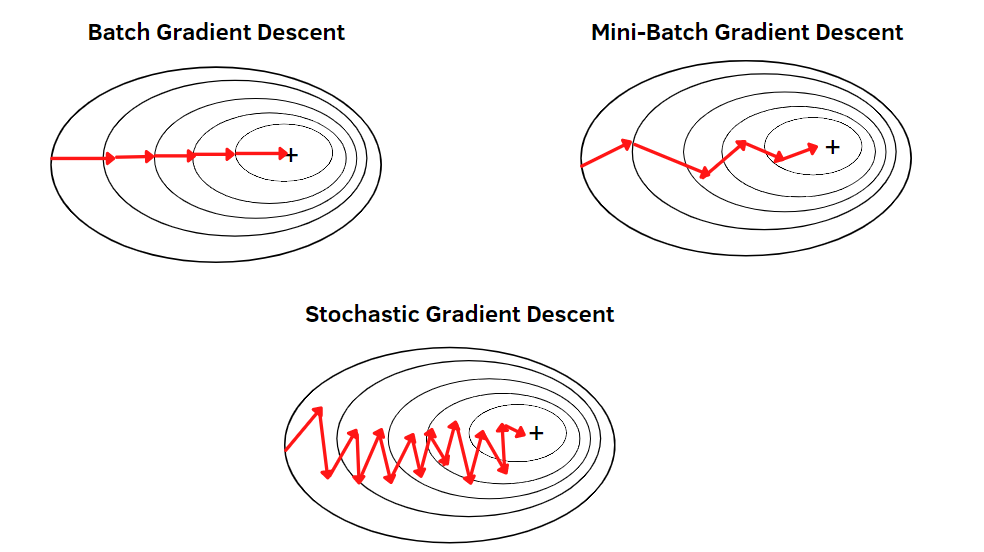

## 1. BATCH GRADIENT DESCENT:
- Batch gradient descent, also known as vanilla gradient descent, calculates the error for each example within the training dataset. Still, the model is not changed until every training sample has been assessed. The entire procedure is referred to as a cycle and a training epoch.

- Some benefits of batch are its computational efficiency, which produces a stable error gradient and a stable convergence. Some drawbacks are that the stable error gradient can sometimes result in a state of convergence that isn’t the best the model can achieve. It also requires the entire training dataset to be in memory and available to the algorithm.


## Advantages

    Fewer model updates mean that this variant of the steepest descent method is more computationally efficient than the stochastic gradient descent method.
    
    Reducing the update frequency provides a more stable error gradient and a more stable convergence for some problems.

#### I will use very simple home prices data set to implement batch and stochastic gradient descent in python. Batch gradient descent uses all training samples in forward pass to calculate cumulitive error and than we adjust weights using derivaties. In stochastic GD, we randomly pick one training sample, perform forward pass, compute the error and immidiately adjust weights. So the key difference here is that to adjust weights batch GD will use all training samples where as stochastic GD will use one randomly picked training sample


In [84]:
# Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Load the dataset in pandas dataframe


In [85]:
dataset = pd.read_csv('homeprices_banglore.csv')
dataset.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [86]:
dataset.isnull().sum()

area        0
bedrooms    0
price       0
dtype: int64

In [87]:
dataset.shape

(20, 3)

In [88]:
dataset.describe()

,area,bedrooms,price
count,20.000000,20.000000,20.000000
mean,1821.450000,2.900000,78.853500
std,864.615794,0.967906,43.761901
min,800.000000,1.000000,32.000000
25%,1173.750000,2.000000,41.500000
50%,1480.500000,3.000000,61.000000
75%,2633.000000,3.250000,106.500000
max,3700.000000,5.000000,167.000000


#### Preprocessing/Scaling: Since our columns are on different sacle it is important to perform scaling on them


In [89]:
# Splitting training and testing data

from sklearn import preprocessing
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(dataset.drop('price',axis='columns'))
scaled_y = sy.fit_transform(dataset['price'].values.reshape(dataset.shape[0],1))

scaled_X

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

### When you minmax scale it will convert your numerical features into the rangr of 0 - 1.

### Gradient descent allows you to find weights (w1,w2,w3) and bias in following linear equation for housing price prediction
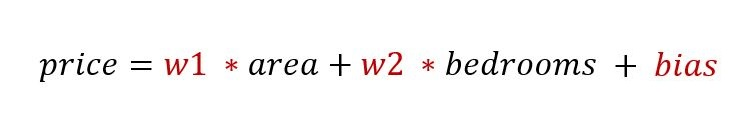

In [90]:
# Let's implement Bacth GD

def batch_gradient_descent(X, y_true, epochs, learning_rate = 0.01):

    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 2 (area, bedroom)
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0] # number of rows in X
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):        
        y_predicted = np.dot(w, X.T) + b

        w_grad = -(2/total_samples)*(X.T.dot(y_true-y_predicted))
        b_grad = -(2/total_samples)*np.sum(y_true-y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.mean(np.square(y_true-y_predicted)) # MSE (Mean Squared Error)
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),200)
w, b, cost

(array([0.77641934, 0.745817  ]), -0.29270697048396327, 0.011596714354952787)

#### Check price equation above. In that equation we were trying to find values of w1,w2 and bias. Here we got these values for each of them,
#### w1 = 0.66469087 w2 = 0.60541671 bias = -0.17792104056392882

### Now plot epoch vs cost graph to see how cost reduces as number of epoch increases


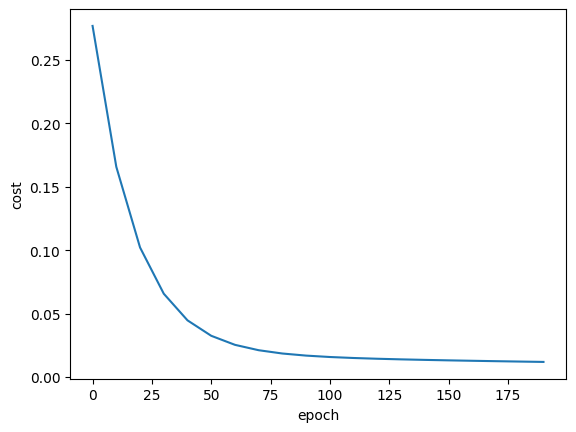

In [91]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

#### Lets do some predictions now.


In [92]:
def predict(area,bedrooms,w,b):
    scaled_X = sx.transform([[area, bedrooms]])[0]
    # here w1 = w[0] , w2 = w[1], w3 = w[2] and bias is b
    # equation for price is w1*area + w2*bedrooms + w3*age + bias
    # scaled_X[0] is area
    # scaled_X[1] is bedrooms
    # scaled_X[2] is age
    scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b
    # once we get price prediction we need to to rescal it back to original value
    # also since it returns 2D array, to get single value we need to do value[0][0]
    return sy.inverse_transform([[scaled_price]])[0][0]

predict(2600,4,w,b)

/home/jagannath/100OfCode/env/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


133.05711552686725

In [93]:
predict(1000,2,w,b)


/home/jagannath/100OfCode/env/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


24.884614329117746

## (2) Stochastic Gradient Descent Implementation


- By contrast, stochastic gradient descent (SGD) changes the parameters for each training sample one at a time for each training example in the dataset. Depending on the issue, this can make SGD faster than batch gradient descent. One benefit is that the regular updates give us a fairly accurate idea of the rate of improvement.

- However, the batch approach is less computationally expensive than the frequent updates. The frequency of such updates can also produce noisy gradients, which could cause the error rate to fluctuate rather than gradually go down.

### Advantages

    You can instantly see your model’s performance and improvement rates with frequent updates.
    
    This variant of the steepest descent method is probably the easiest to understand and implement, especially for beginners.

### Stochastic GD will use randomly picked single training sample to calculate error and using this error we backpropage to adjust weights


In [94]:
# we will use random libary to pick random training sample.
import random
random.randint(0,6) # randit gives random number between two numbers specified in the argument

3

In [95]:
def stochastic_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
 
    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 3 (area, bedroom and age)
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):    
        random_index = random.randint(0,total_samples-1) # random index from total samples
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        
        y_predicted = np.dot(w, sample_x.T) + b
    
        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*(sample_y-y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.square(sample_y-y_predicted)
        
        if i%100==0: # at every 100th iteration record the cost and epoch value
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),5000)
w_sgd, b_sgd, cost_sgd

(array([0.76307934, 0.73614211]), -0.2833662749003481, 0.007128424277366508)

### Compare this with weights and bias that we got using gradient descent. They both of quite similar.



In [96]:
w , b

(array([0.77641934, 0.745817  ]), -0.29270697048396327)

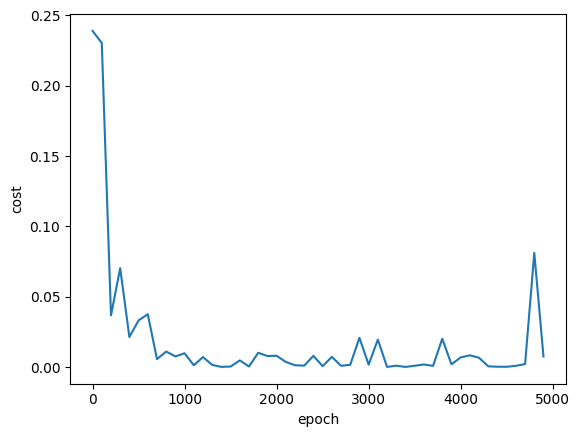

In [97]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd,cost_list_sgd)

In [98]:
predict(2600,4,w_sgd, b_sgd) 


/home/jagannath/100OfCode/env/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


132.22072730959292